# Concept Session
# Demo1: Data Exploration and Model Optimization
# Importing Required Libraries

In [2]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Load Dataset

In [3]:
# load dataset
df = pd.read_csv('weather_australia_niit.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,RainTomorrow
0,17.9,35.2,48.0,6.0,20.0,0
1,18.4,28.9,37.0,19.0,19.0,0
2,19.4,37.6,46.0,30.0,15.0,0
3,21.9,38.4,31.0,6.0,6.0,0
4,24.2,41.0,35.0,17.0,13.0,0
...,...,...,...,...,...,...
1995,17.5,31.3,35.0,24.0,6.0,0
1996,15.2,32.3,35.0,20.0,7.0,0
1997,17.2,33.7,46.0,20.0,19.0,0
1998,14.0,30.6,44.0,13.0,13.0,0


<AxesSubplot:>

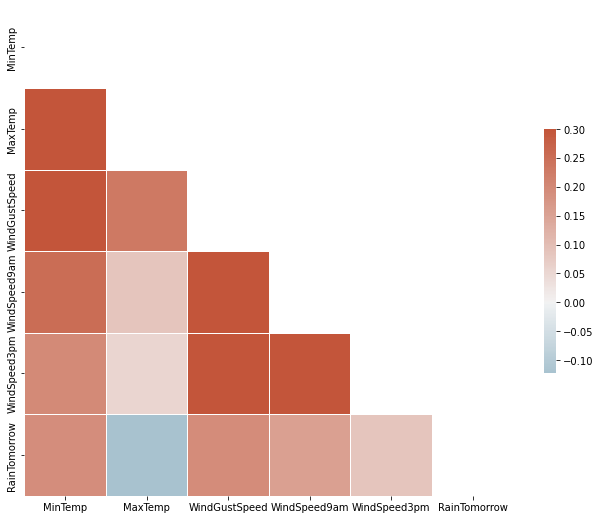

In [4]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
# print information of all columns with datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        2000 non-null   float64
 1   MaxTemp        2000 non-null   float64
 2   WindGustSpeed  2000 non-null   float64
 3   WindSpeed9am   2000 non-null   float64
 4   WindSpeed3pm   2000 non-null   float64
 5   RainTomorrow   2000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.9 KB


# Train Model with Standard Hyperparameters


In [8]:
y = df['RainTomorrow']
X = df.drop('RainTomorrow', axis=1)
print(y.value_counts())

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0) 
print(y_test.value_counts())

#clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
print(clf.score(X_test, y_test))

0    1497
1     503
Name: RainTomorrow, dtype: int64
0    157
1     43
Name: RainTomorrow, dtype: int64
0.745


# Grid Search

In [9]:
grid={"C":np.logspace(-3,3,7),
      "penalty":["l1","l2"],
      "max_iter":[10,50,100,500]}

grid = {'criterion':['gini', 'entropy'],
        'max_depth': [2,4,6,8,10,12]}

clf = tree.DecisionTreeClassifier()

#logreg=LogisticRegression()
clf_cv=GridSearchCV(clf,grid, cv=5)

clf_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}


In [18]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=6).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.795


# Demo2: Cross Validation

In [23]:
train_index

array([ 400,  401,  402, ..., 1997, 1998, 1999])

In [26]:
kf = KFold(n_splits=5)

scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,8,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid, cv=5)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    scores.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.8975
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.8
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.6975
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.7175
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2}
0.7675


In [27]:
np.array(scores).mean()

0.776

## Stratified Cross Validation

In [29]:
skf = StratifiedKFold(n_splits=5)

scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,8,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    scores.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.8975
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.81
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.6975
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.7175
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2}
0.7675


In [30]:
np.array(scores).mean()

0.7780000000000001

# Demo3: Feature Engineering
## 1. Mean Temperature

In [36]:
df

,MinTemp,MaxTemp,WindGustSpeed,RainTomorrow,meanTemp,meanWindSpeed
0,17.9,35.2,48.0,0,26.55,13.0
1,18.4,28.9,37.0,0,23.65,19.0
2,19.4,37.6,46.0,0,28.50,22.5
3,21.9,38.4,31.0,0,30.15,6.0
4,24.2,41.0,35.0,0,32.60,15.0
...,...,...,...,...,...,...
1995,17.5,31.3,35.0,0,24.40,15.0
1996,15.2,32.3,35.0,0,23.75,13.5
1997,17.2,33.7,46.0,0,25.45,19.5
1998,14.0,30.6,44.0,0,22.30,13.0


In [37]:
df['meanTemp'] = (df['MaxTemp']+ df['MinTemp']) / 2
df

,MinTemp,MaxTemp,WindGustSpeed,RainTomorrow,meanTemp,meanWindSpeed
0,17.9,35.2,48.0,0,26.55,13.0
1,18.4,28.9,37.0,0,23.65,19.0
2,19.4,37.6,46.0,0,28.50,22.5
3,21.9,38.4,31.0,0,30.15,6.0
4,24.2,41.0,35.0,0,32.60,15.0
...,...,...,...,...,...,...
1995,17.5,31.3,35.0,0,24.40,15.0
1996,15.2,32.3,35.0,0,23.75,13.5
1997,17.2,33.7,46.0,0,25.45,19.5
1998,14.0,30.6,44.0,0,22.30,13.0


## 2. Mean Wind speed

In [39]:
# df['meanWindSpeed'] = (df['WindSpeed9am']+ df['WindSpeed3pm']) / 2
# df = df.drop(['WindSpeed9am', 'WindSpeed3pm'], axis=1)
# df

## 3. Stratified Cross Validation

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.8975
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.8
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.6975
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6}
0.7175
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8}
0.77


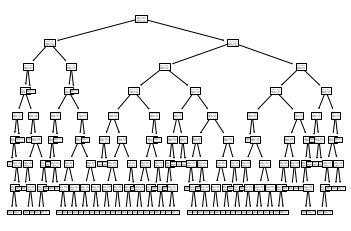

In [40]:
skf = StratifiedKFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,8,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    tree.plot_tree(clf)  
    s = clf.score(X_test, y_test)
    print(s)
    scores.append(s)

In [41]:
np.array(scores).mean()

0.7765